In [59]:
# 경고(warning) 메시지 비표시 설정
import warnings

warnings.filterwarnings("ignore")

# pandas 라이브러리 불러오기
import pandas as pd

In [60]:
customer = pd.read_csv("./data/customer_join.csv")
use_log_months = pd.read_csv("./data/use_log_months.csv")
print(customer.shape,use_log_months.shape)

(4192, 18) (36842, 3)


In [61]:
customer[customer["is_deleted"]==1].head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23


In [62]:
use_log_months.head(3)

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3


In [63]:
use_log_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [64]:
year_months = list(use_log_months["연월"].unique())
use_log = pd.DataFrame()
for i in range(1,len(year_months)):
    # print(year_months[i])
    tmp = use_log_months.loc[use_log_months["연월"] == year_months[i]]
    tmp.rename(columns ={"count": "count_0"},inplace =True)
    tmp_before = use_log_months.loc[use_log_months["연월"]==year_months[i-1]]
    tmp_before.rename(columns = {"count":"count_1"},inplace=True)
    tmp_before.drop("연월",axis=1,inplace=True)
    tmp = pd.merge(tmp,tmp_before,on="customer_id",how="left")
    use_log = pd.concat([use_log,tmp],axis=0,ignore_index=True)

In [65]:
use_log.head()

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [66]:
use_log.groupby("customer_id")["연월"].value_counts()

customer_id  연월    
AS002855     201805    1
             201806    1
             201807    1
             201808    1
             201809    1
                      ..
TS999855     201811    1
             201812    1
             201901    1
             201902    1
             201903    1
Name: count, Length: 33851, dtype: int64

# 탈퇴 전월의 고객 데이터 작성

In [67]:
from dateutil.relativedelta import relativedelta


In [68]:
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["exit_data"]=None
exit_customer["end_date"]=pd.to_datetime(exit_customer["end_date"])

In [69]:
# exit_customer.info()
for i in range(len(exit_customer)):
    exit_customer["exit_data"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)

In [70]:
exit_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_data
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30 00:00:00
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30 00:00:00
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30 00:00:00


In [71]:
exit_customer["연월"] = pd.to_datetime(exit_customer["exit_data"]).dt.strftime("%Y%m")

In [72]:
exit_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_data,연월
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30 00:00:00,201803
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30 00:00:00,201804
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30 00:00:00,201804


In [73]:
exit_customer["연월"] = pd.to_numeric(exit_customer["연월"])

In [74]:
exit_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 708 to 4099
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1350 non-null   object        
 1   name               1350 non-null   object        
 2   class              1350 non-null   object        
 3   gender             1350 non-null   object        
 4   start_date         1350 non-null   object        
 5   end_date           1350 non-null   datetime64[ns]
 6   campaign_id        1350 non-null   object        
 7   is_deleted         1350 non-null   int64         
 8   class_name         1350 non-null   object        
 9   price              1350 non-null   int64         
 10  campaign_name      1350 non-null   object        
 11  mean               1350 non-null   float64       
 12  median             1350 non-null   float64       
 13  max                1350 non-null   int64         
 14  min        

In [75]:
exit_use_log = pd.merge(use_log,exit_customer,on=["customer_id","연월"],how="left")

In [76]:
exit_use_log[exit_use_log["is_deleted"]==1].head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_data
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,2_일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


In [77]:
use_log.head()

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [78]:
exit_use_log.shape

(33851, 22)

In [79]:
exit_use_log = exit_use_log.dropna(subset=["name"])

In [80]:
exit_use_log.shape

(1104, 22)

In [81]:
continue_customer = customer.loc[customer["is_deleted"]==0]

In [82]:
continue_use_log = pd.merge(use_log,continue_customer,on=["customer_id"],how = "left")
print(continue_use_log.shape)
continue_use_log = continue_use_log.dropna(subset=["name"])
print(continue_use_log.shape)

(33851, 21)
(27422, 21)


In [83]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [84]:
customer.loc[customer["is_deleted"] == 0].shape

(2842, 18)

In [85]:
customer.loc[customer["is_deleted"] == 1].shape

(1350, 18)

In [86]:
customer.shape

(4192, 18)

In [87]:
continue_use_log = continue_use_log.sample(frac=1).reset_index(drop=True)
continue_use_log.shape

(27422, 21)

In [88]:
continue_use_log["customer_id"].nunique()

2842

In [89]:
continue_use_log = continue_use_log.drop_duplicates(subset="customer_id")

In [90]:
continue_use_log.shape

(2842, 21)

In [91]:
continue_use_log.head(3)

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201812,HI492596,5,5.0,XXX,C01,M,2016-04-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.666667,4.5,7.0,3.0,1.0,2019-04-30,36.0
1,201812,TS447283,9,10.0,XXXX,C01,M,2018-06-07,NaN,CA2,...,0_종일,10500.0,0_입회비반액할인,7.400000,7.0,10.0,6.0,1.0,2019-04-30,10.0
2,201805,HI183246,4,5.0,XXX,C01,F,2015-10-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.750000,5.0,8.0,1.0,1.0,2019-04-30,42.0


In [93]:
predict_data =pd.concat([continue_use_log,exit_use_log],ignore_index=True)
predict_data.shape

(3946, 22)

# 예측할 달의 재적 기간

In [105]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

In [102]:
predict_data["now_date"]

0      2018-12-01
1      2018-12-01
2      2018-05-01
3      2019-02-01
4      2018-07-01
          ...    
3941   2019-02-01
3942   2019-02-01
3943   2019-02-01
3944   2019-02-01
3945   2019-02-01
Name: now_date, Length: 3946, dtype: datetime64[ns]

In [108]:
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i],predict_data["start_date"][i])
    predict_data["period"]=delta.years*12 + delta.months

In [109]:
predict_data.head(2)

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_data,period,now_date
0,201812,HI492596,5,5.0,XXX,C01,M,2016-04-01,NaT,CA1,...,4.666667,4.5,7.0,3.0,1.0,2019-04-30,36.0,NaN,7,2018-12-01
1,201812,TS447283,9,10.0,XXXX,C01,M,2018-06-07,NaT,CA2,...,7.400000,7.0,10.0,6.0,1.0,2019-04-30,10.0,NaN,7,2018-12-01


In [110]:
predict_data.isna().mean()*100

연월                    0.000000
customer_id           0.000000
count_0               0.000000
count_1               6.512924
name                  0.000000
class                 0.000000
gender                0.000000
start_date            0.000000
end_date             72.022301
campaign_id           0.000000
is_deleted            0.000000
class_name            0.000000
price                 0.000000
campaign_name         0.000000
mean                  0.000000
median                0.000000
max                   0.000000
min                   0.000000
routine_flg           0.000000
calc_date             0.000000
membership_period     0.000000
exit_data            72.022301
period                0.000000
now_date              0.000000
dtype: float64

In [112]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().mean() * 100

연월                    0.000000
customer_id           0.000000
count_0               0.000000
count_1               0.000000
name                  0.000000
class                 0.000000
gender                0.000000
start_date            0.000000
end_date             71.482787
campaign_id           0.000000
is_deleted            0.000000
class_name            0.000000
price                 0.000000
campaign_name         0.000000
mean                  0.000000
median                0.000000
max                   0.000000
min                   0.000000
routine_flg           0.000000
calc_date             0.000000
membership_period     0.000000
exit_data            71.482787
period                0.000000
now_date              0.000000
dtype: float64

In [113]:
predict_data.columns

Index(['연월', 'customer_id', 'count_0', 'count_1', 'name', 'class', 'gender',
       'start_date', 'end_date', 'campaign_id', 'is_deleted', 'class_name',
       'price', 'campaign_name', 'mean', 'median', 'max', 'min', 'routine_flg',
       'calc_date', 'membership_period', 'exit_data', 'period', 'now_date'],
      dtype='object')

In [118]:
traget_col = [ "is_deleted","gender","class_name","campaign_name","routine_flg","period","count_0","count_1"]

In [ ]:
predict_data = predict_data[traget_col]
predict_data.head(1)


,is_deleted,gender,class_name,campaign_name,routine_flg,period,count_0,count_1
0,0.0,M,0_종일,2_일반,1.0,7,5,5.0


In [121]:
predict_data_dumies = pd.get_dummies(predict_data,drop_first=True)
predict_data_dumies.head(2)

,is_deleted,routine_flg,period,count_0,count_1,gender_M,class_name_1_주간,class_name_2_야간,campaign_name_1_입회비무료,campaign_name_2_일반
0,0.0,1.0,7,5,5.0,True,False,False,False,True
1,0.0,1.0,7,9,10.0,True,False,False,False,False


# 탈퇴 예측 모델

In [142]:
predict_data_dumies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3689 entries, 0 to 3945
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   is_deleted             3689 non-null   float64
 1   routine_flg            3689 non-null   float64
 2   period                 3689 non-null   int64  
 3   count_0                3689 non-null   int64  
 4   count_1                3689 non-null   float64
 5   gender_M               3689 non-null   bool   
 6   class_name_1_주간        3689 non-null   bool   
 7   class_name_2_야간        3689 non-null   bool   
 8   campaign_name_1_입회비무료  3689 non-null   bool   
 9   campaign_name_2_일반     3689 non-null   bool   
dtypes: bool(5), float64(3), int64(2)
memory usage: 320.0 KB


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = predict_data_dumies.drop("is_deleted", axis=1)
y = predict_data_dumies['is_deleted']

X.shape,y.shape

((3689, 9), (3689,))

In [139]:
import seaborn as sns

<Axes: >

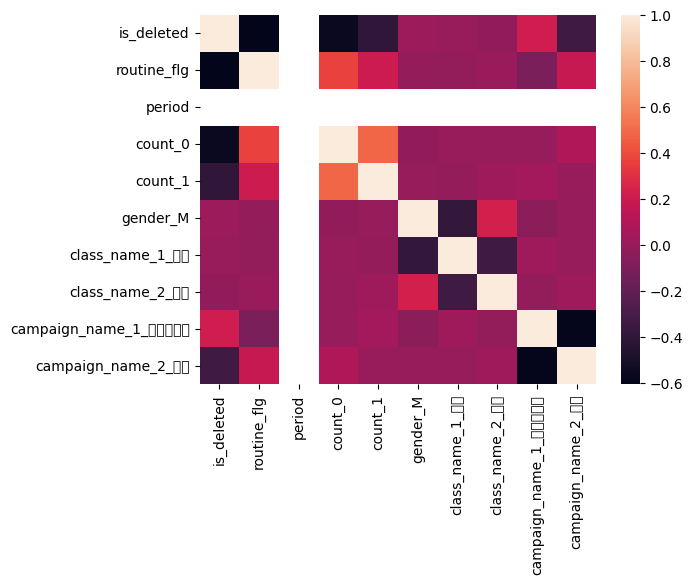

In [140]:
sns.heatmap(predict_data_dumies.corr())

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2951, 9) (738, 9) (2951,) (738,)


In [147]:
y_train.head()

3595    1.0
2085    0.0
2634    0.0
1369    0.0
305     0.0
Name: is_deleted, dtype: float64

In [152]:
dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)


In [153]:
dt_model.score(X_train,y_train)

0.9413758048119282

In [154]:
dt_model.score(X_test,y_test)

0.8929539295392954

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
f1_score(y_test,dt_pred)
accuracy_score(y_test, dt_pred)
roc_auc_score(y_test, dt_pred)

0.8105515587529976

In [ ]:
# 모델에 기여한 변수


In [160]:
importance = pd.DataFrame({"feature_names": X.columns,"coeff": dt_model.feature_importances_})
importance

,feature_names,coeff
0,routine_flg,0.462553
1,period,0.000000
2,count_0,0.219561
3,count_1,0.138730
4,gender_M,0.018238
5,class_name_1_주간,0.016930
6,class_name_2_야간,0.019936
7,campaign_name_1_입회비무료,0.010821
8,campaign_name_2_일반,0.113231


In [168]:
importance.feature_names.tolist()

['routine_flg',
 'period',
 'count_0',
 'count_1',
 'gender_M',
 'class_name_1_주간',
 'class_name_2_야간',
 'campaign_name_1_입회비무료',
 'campaign_name_2_일반']

In [169]:
X2 = X[["routine_flg", "count_0", "campaign_name_2_일반"]]
X2.head()

,routine_flg,count_0,campaign_name_2_일반
0,1.0,5,True
1,1.0,9,False
2,1.0,4,True
3,1.0,5,True
4,1.0,9,True


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2951, 3) (738, 3) (2951,) (738,)


In [171]:
dt_model2 = DecisionTreeClassifier(random_state=5)
dt_model2.fit(X_train, y_train)
dt_pred = dt_model2.predict(X_test)

In [174]:
print(f1_score(y_test, dt_pred),
accuracy_score(y_test, dt_pred),
roc_auc_score(y_test, dt_pred))

0.8040201005025126 0.8943089430894309 0.8462618462618463


# 회원 탈퇴 예측

In [176]:
routine_flg = 1
count_0 = 5
campaign_name_2_일반 = 1
input_data = [[routine_flg,count_0,campaign_name_2_일반]]

dt_pred3 = dt_model2.predict(input_data)

In [177]:
dt_pred3

array([0.])

In [180]:
!uv add pip

Resolved 124 packages in 838ms
 Downloaded pip
Prepared 1 package in 1.80s
Installed 1 package in 226ms
 + pip==25.1.1


In [181]:
!uv add auto-sklearn

  × Failed to build `auto-sklearn==0.15.0`
  ├─▶ The build backend returned an error
  ╰─▶ Call to `setuptools.build_meta:__legacy__.build_wheel` failed (exit
      code: 1)

      [stderr]
      Traceback (most recent call last):
        File "<string>", line 14, in <module>
          requires = get_requires_for_build({})
        File
      "C:\Users\user\AppData\Local\uv\cache\builds-v0\.tmpsHE4RL\Lib\site-packages\setuptools\build_meta.py",
      line 331, in get_requires_for_build_wheel
          return self._get_build_requires(config_settings, requirements=[])
                 ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File
      "C:\Users\user\AppData\Local\uv\cache\builds-v0\.tmpsHE4RL\Lib\site-packages\setuptools\build_meta.py",
      line 301, in _get_build_requires
          self.run_setup()
          ~~~~~~~~~~~~~~^^
        File
      "C:\Users\user\AppData\Local\uv\cache\builds-v0\.tmpsHE4RL\Lib\site-packages\setuptools\build_meta.py",
      line 51